In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
import json
from io import BytesIO
import seaborn as sns

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

print("✅ Libraries imported successfully!")
print(f"PyTorch version: {torch.__version__}")
print(f"OpenCV version: {cv2.__version__}")

✅ Libraries imported successfully!
PyTorch version: 2.6.0+cpu
OpenCV version: 4.10.0


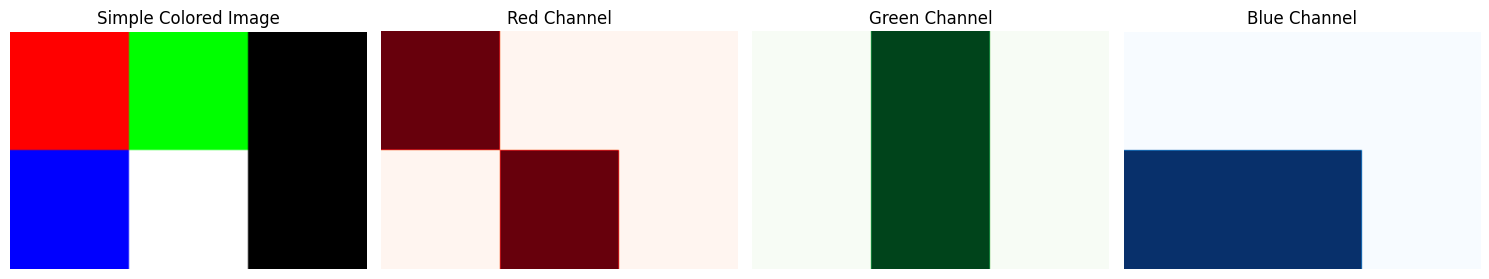

Image shape: (100, 150, 3)
Data type: uint8
Min value: 0
Max value: 255
Memory usage: 45000 bytes


In [3]:
# Create a simple image to understand the data structure
# TODO: Create a simple colored image using numpy
# Hint: Use np.zeros to create a base, then add colors
height, width = 100, 150
simple_image = np.zeros((height, width, 3), dtype=np.uint8)

# TODO: Add some colored regions
# Red square in top-left
simple_image[:50, :50, 0] = 255  # Red channel
# Green square in top-right  
simple_image[:50, 50:100, 1] = 255  # Green channel
# Blue square in bottom-left
simple_image[50:, :50, 2] = 255  # Blue channel
# White square in bottom-right
simple_image[50:, 50:100, :] = 255  # All channels

# Visualize and analyze
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 4, 1)
plt.imshow(simple_image)
plt.title('Simple Colored Image')
plt.axis('off')

# TODO: Show individual color channels
channels = ['Red', 'Green', 'Blue']
cmaps    = ['Reds', 'Greens', 'Blues']

for i, (ch, cmap) in enumerate(zip(channels, cmaps)):
    plt.subplot(1, 4, i+2)
    plt.imshow(simple_image[:, :, i], cmap=cmap) # Use the correct channel index
    plt.title(f'{ch} Channel')
    plt.axis('off')

plt.tight_layout()
plt.show()

# TODO: Print image properties
print(f"Image shape: {simple_image.shape}")  # simple_image.shape
print(f"Data type: {simple_image.dtype}")    # simple_image.dtype
print(f"Min value: {simple_image.min()}")    # simple_image.min()
print(f"Max value: {simple_image.max()}")    # simple_image.max()
print(f"Memory usage: {simple_image.nbytes} bytes")  # simple_image.nbytes

📥 Loading sample image...
✅ Image downloaded successfully!


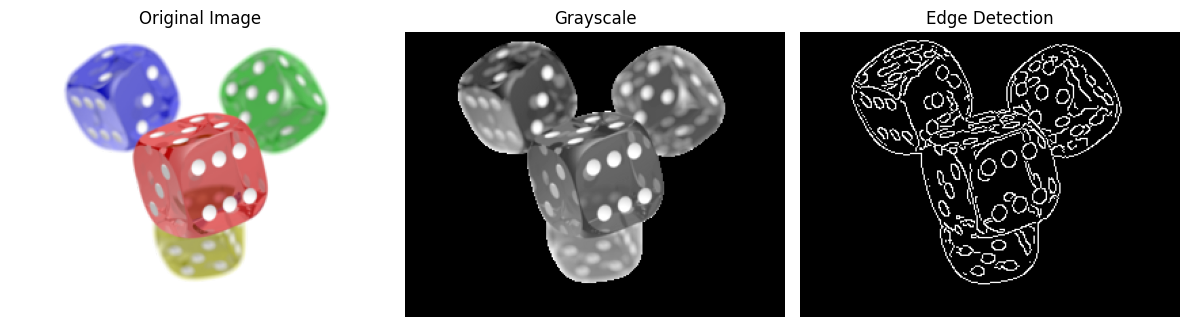

Original shape: (210, 280, 4)
Grayscale shape: (210, 280)
Pixel value range: 0 to 255


In [4]:
# Download a sample image from the internet
def download_image(url, filename):
    """Download an image from URL"""
    try:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content))
        return image
    except Exception as e:
        print(f"Error downloading image: {e}")
        return None

# Sample image URLs (feel free to replace with your own)
sample_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/PNG_transparency_demonstration_1.png/280px-PNG_transparency_demonstration_1.png",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/5/50/Vd-Orig.png/256px-Vd-Orig.png"
]

# TODO: Try to download an image, or create a sample if download fails
print("📥 Loading sample image...")
try:
    sample_image = download_image(sample_urls[0], "sample.png")
    if sample_image is None:
        raise Exception("Download failed")
    print("✅ Image downloaded successfully!")
except:
    print("📁 Creating local sample image...")
    # Create a more complex sample image
    sample_array = np.random.randint(0, 256, (200, 300, 3), dtype=np.uint8)
    # Add some patterns
    cv2.circle(sample_array, (150, 100), 50, (255, 0, 0), -1)  # Blue circle
    cv2.rectangle(sample_array, (50, 50), (100, 150), (0, 255, 0), -1)  # Green rectangle
    sample_image = Image.fromarray(sample_array)
    print("✅ Sample image created!")

# Convert to numpy for analysis
img_array = np.array(sample_image)

# TODO: Display and analyze the image
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')

# TODO: Convert to grayscale
gray_image = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)  # Use cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

# TODO: Apply edge detection
edges = cv2.Canny(gray_image, 50, 150)  # Use cv2.Canny(gray_image, 50, 150)
plt.subplot(1, 3, 3)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()

# TODO: Print image statistics
print(f"Original shape: {img_array.shape}")  # img_array.shape
print(f"Grayscale shape: {gray_image.shape}")  # gray_image.shape
print(f"Pixel value range: {img_array.min()} to {img_array.max()}")  # img_array.min(), img_array.max()